## Columns
#### age:
age of primary beneficiary
#### sex: 
insurance contractor gender, female, male
#### bmi: 
Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
#### children: 
Number of children covered by health insurance / Number of dependents
#### smoker: 
Smoking
##### region: 
the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
#### charges: 
Individual medical costs billed by health insurance

## Task
Can you accurately predict insurance costs?


In [1]:
#pip install xgboost

In [2]:
#General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling libraries


#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
#from xgboost import XGBRegressor

### Data Wrangling

In [3]:
Med=pd.read_csv('insurance.csv')
Med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#dealing with wrong data types
#Med['sex'] = pd.to_Boolean(Med['sex'])

In [6]:
Med.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

In [7]:
Med.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


No outliers in the data

In [8]:
Med.duplicated().sum()

1

### Dropping duplicates

In [9]:
Med = Med.drop_duplicates(keep=False)

# Using DataFrame.drop_duplicates() to keep first duplicate row
#df2 = df.drop_duplicates(keep='first')

# keep last duplicate row
#df2 = df.drop_duplicates( keep='last')

# Remove all duplicate rows 
#df2 = df.drop_duplicates(keep=False)

# Delete duplicate rows based on specific columns 
#df2 = df.drop_duplicates(subset=["Courses", "Fee"], keep=False)

# Drop duplicate rows in place
#df.drop_duplicates(inplace=True)

# Using DataFrame.apply() and lambda function 
#df2 = df.apply(lambda x: x.astype(str).str.lower()).drop_duplicates(subset=['Courses', 'Fee'], keep='first')


In [10]:
Med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#import profile 
from pandas_profiling import ProfileReport

In [12]:
#creating the report
profile = ProfileReport(Med)

In [13]:
#output the report
profile.to_file(output_file = 'insurance_profiling.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#showing the profile
profile

In [15]:
#view sex
Med['sex'].value_counts()

male      674
female    662
Name: sex, dtype: int64

In [16]:
#view smoker
Med['smoker'].head().value_counts

<bound method IndexOpsMixin.value_counts of 0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object>

In [17]:
#view region
Med['region'].value_counts

<bound method IndexOpsMixin.value_counts of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1336, dtype: object>

In [18]:
to_map={
    'male':1,
    'female':0
}

Med['sex']=Med['sex'].replace(to_map)

In [19]:
Med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [20]:
to_map={
    'yes':1,
    'no':0
}

Med['smoker']=Med['smoker'].replace(to_map)

In [21]:
Med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [22]:
to_map={
    'southwest':0,
    'southeast':1,
    'northwest':2,
    'northeast':3
}

Med['region']=Med['region'].replace(to_map)

In [23]:
Med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


The data is now clean with all values numerical and ready for modeling

In [24]:
Med.duplicated().sum()

0

In [25]:
Med.describe()

,age,sex,bmi,children,smoker,region,charges
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,0.504491,30.663507,1.096557,0.205090,1.483533,13287.833731
std,14.038678,0.500167,6.102752,1.205650,0.403918,1.105532,12110.702320
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.272500,0.000000,0.000000,1.000000,4746.875675
50%,39.000000,1.000000,30.380000,1.000000,0.000000,1.000000,9388.753650
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16687.364100
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Checking for correlation

<AxesSubplot:>

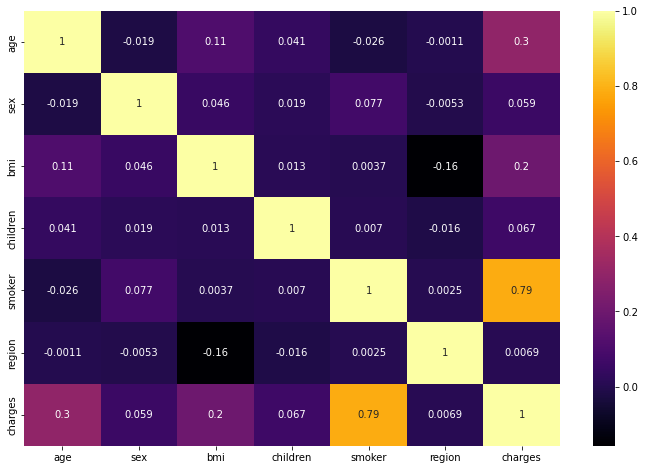

In [26]:
#correlation matrix
corr_matrix=Med.corr()

#visualize
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='inferno')

From the dataset,there's a low correlation between the attributes. But we can deduce that smoker is correlated, to some sxtend, to charges with at +0.79

### Feature Engineering

In [27]:
#extract weight from bmi
#Med['weight']=Med['bmi'].bmi.weight

### Exploratory Data Analysis

1.What age is charged the highest(how does age affect the charges)?
2.How does bmi affect the insurance cost?
3.Does a person's region affects the insurance cost?

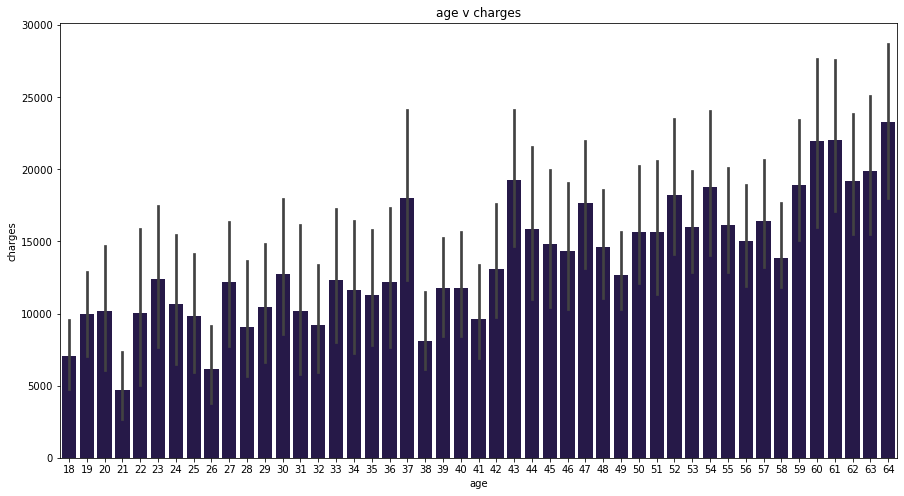

In [28]:
#age and charges
plt.figure(figsize=(15,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='age',y='charges',data=Med,color =color_palette);
plt.title('age v charges');


Insurance cost generally increases with increase in age. This is a fact because as one grows older, he/she is prone to very many illnesses which reduces his immunity. Also the person can, sometimes, be having dependants whom he/she is paying their medical insurance cover. This eventually will accumulate more insurance cost.|| Children pay lower insurance cost because they have high immunity so they are healthy and also they have no dependants.

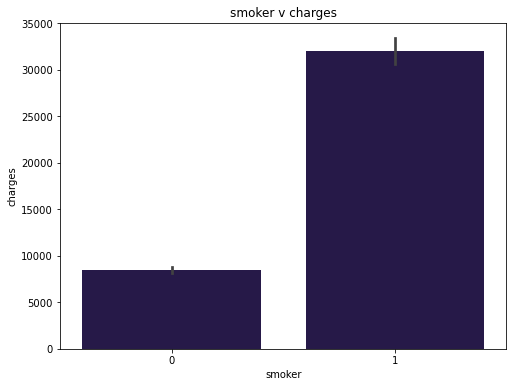

In [29]:
#smoker and charges
plt.figure(figsize=(8,6))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='smoker',y='charges',data=Med,color =color_palette);
plt.title('smoker v charges');


Smokers pay higher medical insurance cost. This is because these people have got damaged lungs as a result of smoking and they are subjected to very many illnesses such cancer which requires a lot of money for treatment.

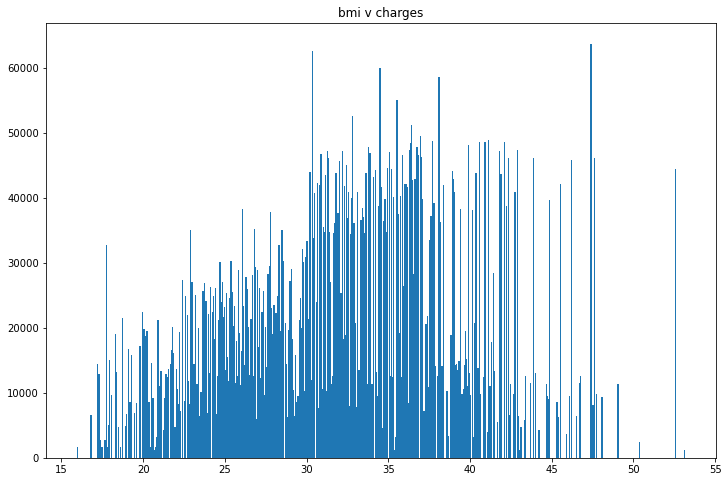

In [30]:
#bmi and charges
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
plt.bar(Med['bmi'],Med['charges'],width=0.08)
plt.title('bmi v charges');



Peple with low to medium bmi pay higher insurance cost which could be as a result of emaciation which then calls for close medical check-up in terms nutrition and diet. Also some individuals with high bmi pay high insurance cost - this could be because of complications associated with obesity such hypertension.

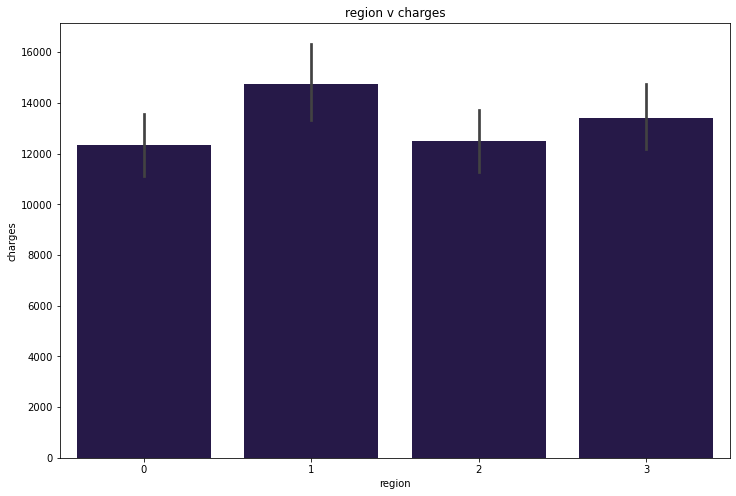

In [31]:
#region and charges
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='region',y='charges',data=Med,color =color_palette);
plt.title('region v charges');


#### Regions
'southwest':0,
'southeast':1,
'northwest':2,
'northeast':3.
People from Southwest pay low insurance amount while those from Southeast pay a higher insurance amount

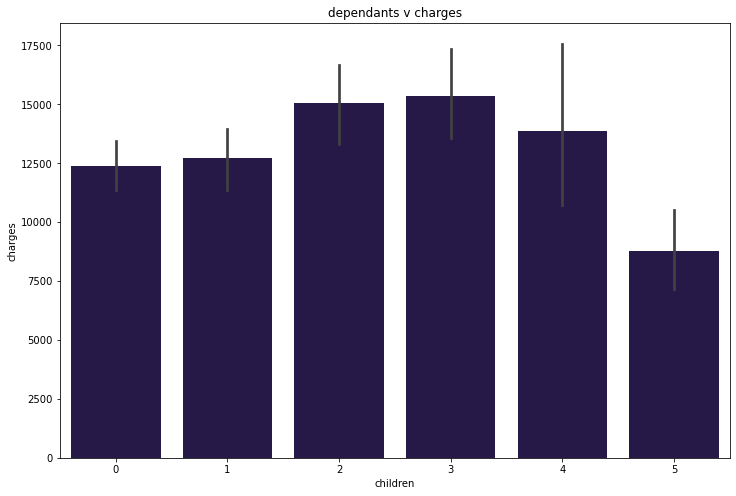

In [32]:
#no of children and charges
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='children',y='charges',data=Med,color =color_palette);
plt.title('dependants v charges');


A person with more dependants pays less insurance cost as compared to someone with fewer dependants. A person with 2 to 3 children is likely to pay more insurance cost.

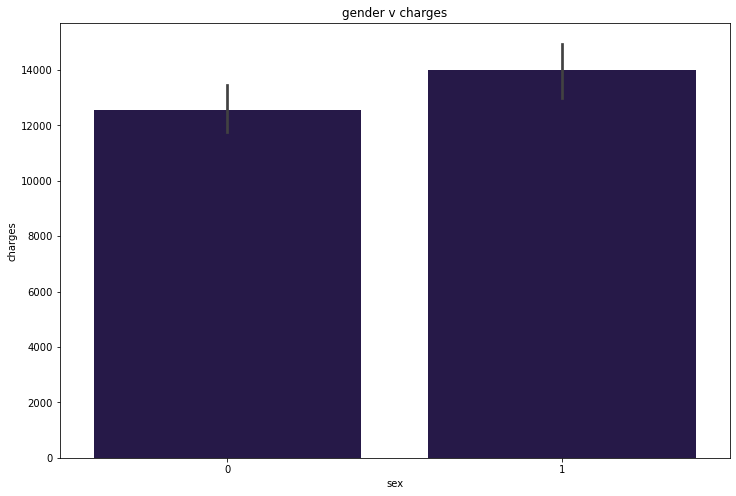

In [33]:
#sex and charges
plt.figure(figsize=(12,8))
color_palette = sns.color_palette('magma')[0]
sns.barplot(x='sex',y='charges',data=Med,color =color_palette);
plt.title('gender v charges');


Females pay more insurance cost than males

### Modeling

In [34]:
#splitting the data (split, validate and test)
x = Med.drop('charges', axis=1)
y = Med['charges']

x_train, x_temp, y_train, y_temp = train_test_split(x,
                                                    y, 
                                                    train_size=0.8, 
                                                    random_state=7)

x_val, x_test, y_val, y_test = train_test_split(x_temp,
                                                 y_temp, 
                                                 train_size=0.5, 
                                                 random_state=7)

In [35]:
#instantiating the models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()

models = [linear_regression, decision_tree, random_forest, gradient_boosting]


In [36]:
#using for loop to train the model
for model in models:
    
    #fitting the model
    model.fit(x_train, y_train)
    
    #evaluating the model
    predictions = model.predict(x_val)
    mae = metrics.mean_absolute_error(y_val, predictions)
    rmse = metrics.mean_squared_error(y_val, predictions, squared=False)
    print(f'The {model} model has a mean absolute error of {mae} and a root mean squared error of {rmse}')
    

The LinearRegression() model has a mean absolute error of 4460.144816527416 and a root mean squared error of 6457.017940631036
The DecisionTreeRegressor() model has a mean absolute error of 3927.695073992537 and a root mean squared error of 7918.062183660972
The RandomForestRegressor() model has a mean absolute error of 2929.832153453358 and a root mean squared error of 5245.601611138821
The GradientBoostingRegressor() model has a mean absolute error of 2579.831741774918 and a root mean squared error of 4870.465575603102


In [37]:
predictions = gradient_boosting.predict(x_test)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = metrics.mean_squared_error(y_test, predictions, squared=False)
print(f'The {model} model has a mean absolute error of {mae} and a root mean squared error of {rmse}')
    

The GradientBoostingRegressor() model has a mean absolute error of 2654.6974593632035 and a root mean squared error of 4896.510762796525


In [38]:
#saving the model
import joblib
joblib.dump(gradient_boosting,'best_model.pkl')

['best_model.pkl']